<a href="https://colab.research.google.com/github/asantone/python/blob/master/meanByGroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro text

   id condition  time  value
0   1   control   1.0      4
1   2   control   1.0      2
2   3   control   1.0      4
3   4   control   1.0      2
4   5   control   1.0      2
   time  condition  value
0   1.0    control   2.90
1   1.0  treatment   3.00
2   2.0    control   3.45
3   2.0  treatment   6.10
4   3.0    control   2.90


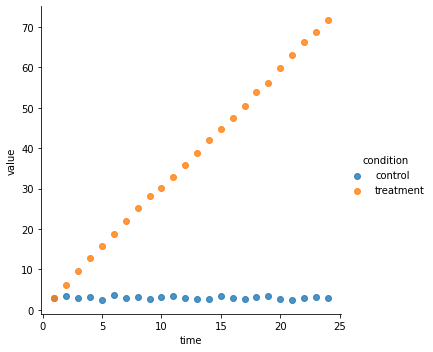

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url_control = 'https://raw.githubusercontent.com/asantone/python/master/data/control.csv'
url_treatment = 'https://raw.githubusercontent.com/asantone/python/master/data/treatment.csv'

control = pd.read_csv(url_control) 
treatment = pd.read_csv(url_treatment) 

#print(control.head(5))
#print(treatment.head(5))

control['condition'] = np.resize('control',len(control))
treatment['condition'] = np.resize('treatment',len(treatment))
#print(control.head(5))
#print(treatment.head(5))

frames = [control,treatment]

data = pd.concat(frames)

#print(data.head(5))

melted = pd.melt(data,
                       ['id','condition'],
                       var_name='time',
                       value_name='value')
#melted = melted.sort_values(by=['id','time'])
#melted.head(10)

#convert character values to numeric
melted.time = melted.time.astype(float)

print(melted.head(5))

#average by x value
#avg = np.mean(melted.time, axis=1)
#avg.head(5)
#summary = melted.describe(include= 'all')
#summary = summary.transpose()

#summarize data by obtaining means for each time level by condition
summary = melted.groupby(['time','condition'], as_index=False)['value'].mean()
#print(summary.head(5))

#my_color=np.where(condition='treatment', 'orange', 'skyblue')


#melted.plot(kind='scatter',x='time',y='value',color='red')
#melted.plot(kind='line',x='time',y='value', hue='condition')
#melted.plot(kind='line',x='time',y='value', color='condition')

#shows all data
#sns.lmplot('time', 'value', data=melted, hue='condition', fit_reg=False)

#shows summarized means
sns.lmplot('time', 'value', data=summary, hue='condition', fit_reg=False)
plt.show()